In [1]:
#dataset is taken from kaggle = https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
dataset2 = dataset.copy()

In [5]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
dataset.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#dropping all unneccessary columns which are not needed
dataset.drop(columns=['society','availability','area_type','balcony'],inplace=True)

In [10]:
#checking the null values in all columns
dataset.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Dealing with missing values in dataset

In [12]:
#checking which value has what number of count in dataset to fill the missing values
dataset['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [13]:
#filling missing value with fillna function
dataset['location'] = dataset['location'].fillna('Sarjapur  Road')

In [14]:
#checking which value has what number of count in dataset to fill the missing values
dataset['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [15]:
#filled missing value of size column
dataset['size'] = dataset['size'].fillna('2 BHK')

In [16]:
#filled missing value of bath column with the median value
dataset['bath'] = dataset['bath'].fillna(dataset['bath'].median())

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
#we have split number and string from rows and convert them in integers
dataset['size'] = dataset['size'].str.split().str.get(0).astype(int)

In [19]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [20]:
dataset['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
#made a function that will solve the range values from total_sqft column
def convert(x):
    a = x.split('-')
    if len(a) == 2:
        return(float(a[0]) + float(a[1]))/2           #calculating mean on values which are in range
    try:
        return float(x)
    except:                         #we have used ecept because if any nan value will present it will throw an exception
        return None

In [22]:
#passing refrence with apply function
dataset['total_sqft'] = dataset['total_sqft'].apply(convert)

In [23]:
dataset['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [25]:
dataset['price_per_sqft'] = dataset['price'] * 100000 / dataset['total_sqft']

In [26]:
dataset['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [27]:
dataset.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13320.000000,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,2.802778,1559.626694,2.688814,112.565627,7.907501e+03
std,1.294496,1238.405258,1.338754,148.971674,1.064296e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,120.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [28]:
'''column location has many different location so it is not possible to map them as number so locations 
   which have less than 10 value count will rename as other'''
dataset['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [29]:
#using strip function we had removed all white spaces present in all rows
dataset['location'] = dataset['location'].apply(lambda x:x.strip())
location_count = dataset['location'].value_counts()

In [30]:
#found all rows with less than count of 10
location_count_less10 = location_count[location_count<=10]
location_count_less10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [31]:
dataset['location'] = dataset['location'].apply(lambda x : 'other' if x in location_count_less10 else x)

#outliers Detection and removing

In [33]:
dataset.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13320.000000,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,2.802778,1559.626694,2.688814,112.565627,7.907501e+03
std,1.294496,1238.405258,1.338754,148.971674,1.064296e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,120.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [34]:
#outliers in size like min 1sqft is not possible and 40 bath is also a outlier 

In [35]:
dataset = dataset[((dataset['total_sqft']/dataset['size'])>=300)]

In [36]:
dataset.describe()

,size,total_sqft,bath,price,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,2.650838,1594.564544,2.559537,111.382401,6303.979357
std,0.976678,1261.271296,1.077938,152.077329,4162.237981
min,1.000000,300.000000,1.000000,8.440000,267.829813
25%,2.000000,1116.000000,2.000000,49.000000,4210.526316
50%,3.000000,1300.000000,2.000000,70.000000,5294.117647
75%,3.000000,1700.000000,3.000000,115.000000,6916.666667
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


In [37]:
dataset.shape

(12530, 6)

In [38]:
dataset.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

dataset = remove_outlier_sqft(dataset)
dataset.describe()

,size,total_sqft,bath,price,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,2.574896,1508.440608,2.471702,91.286372,5659.062876
std,0.897649,880.694214,0.979449,86.342786,2265.774749
min,1.000000,300.000000,1.000000,10.000000,1250.000000
25%,2.000000,1110.000000,2.000000,49.000000,4244.897959
50%,2.000000,1286.000000,2.000000,67.000000,5175.600739
75%,3.000000,1650.000000,3.000000,100.000000,6428.571429
max,16.000000,30400.000000,16.000000,2200.000000,24509.803922


In [40]:
def bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats ={}
        for size,bhk_df in location_df.groupby('size'):
            bhk_stats[size] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        #print(location,bhk_stats)
        for size,bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
dataset = bhk_outlier(dataset)

In [42]:
dataset.shape

(7360, 6)

In [43]:
dataset

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668
...,...,...,...,...,...,...
10292,other,2,1200.0,2.0,70.0,5833.333333
10293,other,1,1800.0,1.0,200.0,11111.111111
10296,other,2,1353.0,2.0,110.0,8130.081301
10297,other,1,812.0,1.0,26.0,3201.970443


In [44]:
dataset.drop(columns=['bath','price_per_sqft'],inplace=True)

Cleaned data

In [46]:
dataset.head()

,location,size,total_sqft,price
0,1st Block Jayanagar,4,2850.0,428.0
1,1st Block Jayanagar,3,1630.0,194.0
2,1st Block Jayanagar,3,1875.0,235.0
3,1st Block Jayanagar,3,1200.0,130.0
4,1st Block Jayanagar,2,1235.0,148.0


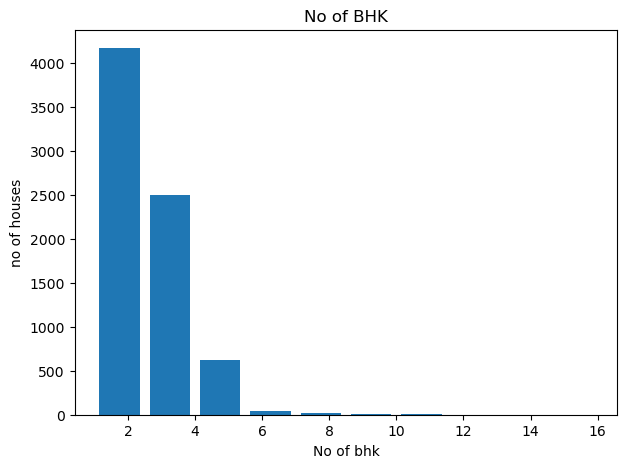

In [47]:
#Data visulization
plt.figure(figsize=(7,5))
plt.title("No of BHK")
plt.xlabel("No of bhk")
plt.ylabel("no of houses")
plt.hist(dataset['size'],rwidth = 0.8)
plt.show()

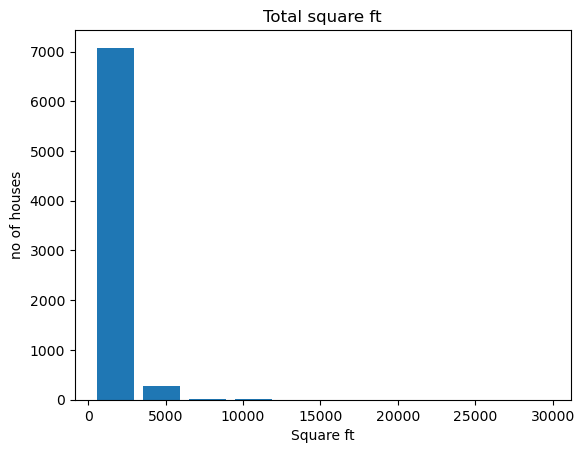

In [158]:
plt.title("Total square ft")
plt.xlabel("Square ft")
plt.ylabel("no of houses")
plt.hist(dataset['total_sqft'],rwidth = 0.8)
plt.show()

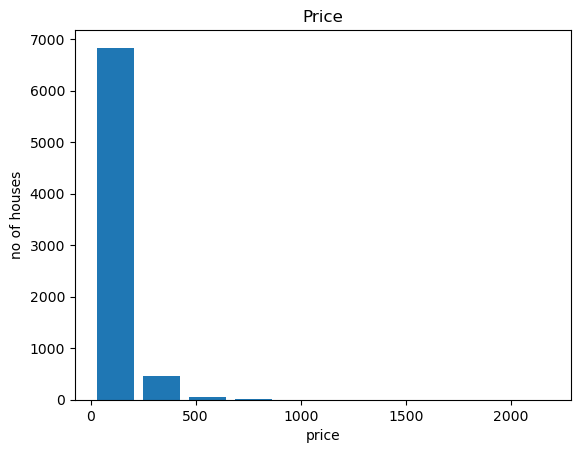

In [146]:
#plt.figure(figsize=(7,5))
plt.title("Price")
plt.xlabel("price")
plt.ylabel("no of houses")
plt.hist(dataset['price'],rwidth = 0.8)
plt.show()

In [49]:
dataset.to_csv('cleaned_dataset')

In [50]:
#making x and y for target value and features
x=dataset.drop(columns=['price'])
y=dataset['price']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
print(x_train.shape)
print(x_test.shape)

(5888, 3)
(1472, 3)


In [54]:
#Applying Linear Regression

In [55]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False) , ['location']),
                                       remainder ='passthrough')

In [56]:
scaler = StandardScaler()

In [57]:
lr = LinearRegression(positive=True)

In [58]:
pipe = make_pipeline(column_trans,scaler,lr)

In [59]:
pipe.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(positive=True))])

In [60]:
y_pred_lr = pipe.predict(x_test)

In [61]:
p1= r2_score(y_test,y_pred_lr)
p1

0.8285916256565939

In [62]:
#applying lasso

In [63]:
lasso = Lasso()

In [64]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [65]:
pipe.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [66]:
y_pred_lasso = pipe.predict(x_test)
p2=r2_score(y_test,y_pred_lasso)
p2

0.8193049863205332

In [67]:
ridge = Ridge()

In [68]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [69]:
pipe.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [70]:
y_pred_ridge = pipe.predict(x_test)
p3=r2_score(y_test,y_pred_ridge)
p3

0.8281601649199591

In [71]:
print('Linear regression : ',p1, '\nLasso :' ,p2, '\nRidge : ',p3)

Linear regression :  0.8285916256565939 
Lasso : 0.8193049863205332 
Ridge :  0.8281601649199591


In [150]:
import pickle

In [152]:
pickle.dump(pipe,open("RidgeModel.pkl",'wb'))